# Experiments for the 2D Eiknonal equation in a square, using vanilla PINNs

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_cube import plot_2d_proj
from Hamiltonians.H_Autograd import Eikonal_sq_autograd

dim = 2

side_length = 6.

from PointSampling.Cube import data_gen_cube
domain = data_gen_cube(side_length, dim)

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0

In [2]:
from Training.training import train
from error_test.cube_error import error_cube


training_params = {
    'numerical_scheme': Eikonal_sq_autograd,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u term
    'lambda': 1. #weight parameter for the boundary loss
    }

delta_list = [.75, .5] #, .3, .1, .05]
alpha_list = [10., 5.] #, 2., 1., .1]
rounds = len(delta_list)

N_col_list = [60]*rounds
N_b_list = [20]*rounds
num_iterations_list = [1000]*rounds

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\usuario\Documents\math\project_FD_PINNs\HamiltonJacobi_LeastSquares_LxF_NNs\Notebooks_revised\..\Hamiltonians\H_Autograd.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(X, requires_grad= True)
100%|██████████| 1000/1000 [00:04<00:00, 204.83it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


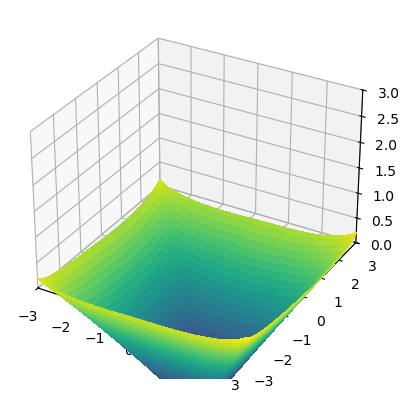

Mean square error: tensor(6.2594)
L-infinity error: tensor(5.9523)
Run time: tensor(9.7577)


100%|██████████| 1000/1000 [00:04<00:00, 205.69it/s]


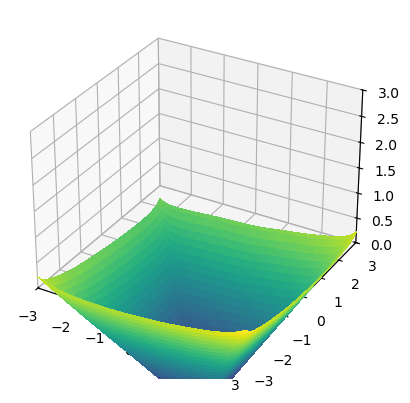

Mean square error: tensor(6.4408)
L-infinity error: tensor(6.0052)
Run time: tensor(9.9147)


100%|██████████| 1000/1000 [00:05<00:00, 199.50it/s]


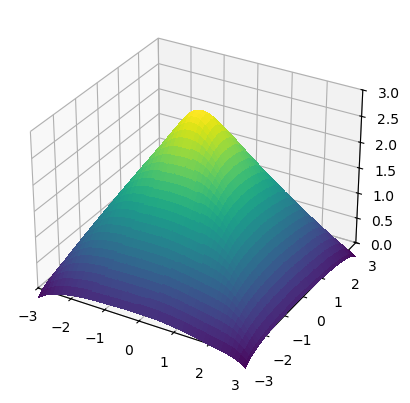

Mean square error: tensor(0.0138)
L-infinity error: tensor(0.2887)
Run time: tensor(10.0345)


100%|██████████| 1000/1000 [00:05<00:00, 197.90it/s]


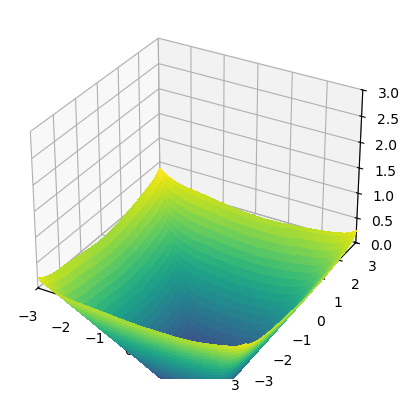

Mean square error: tensor(6.3011)
L-infinity error: tensor(5.9801)
Run time: tensor(10.0356)


100%|██████████| 1000/1000 [00:04<00:00, 201.93it/s]


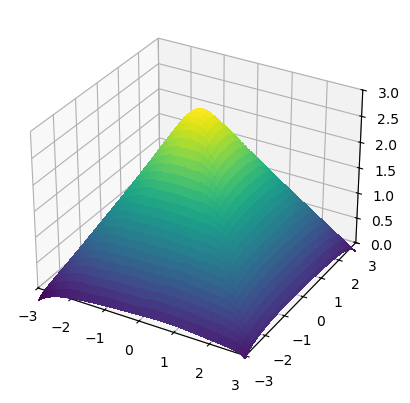

Mean square error: tensor(0.0139)
L-infinity error: tensor(0.2681)
Run time: tensor(10.5602)


100%|██████████| 1000/1000 [00:05<00:00, 184.73it/s]


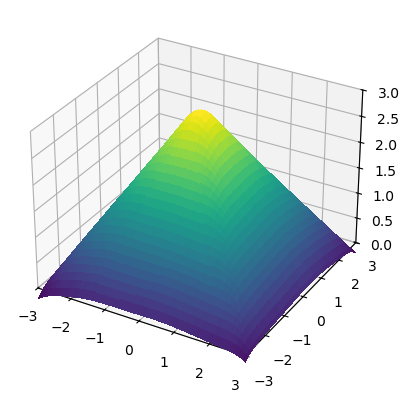

Mean square error: tensor(0.0104)
L-infinity error: tensor(0.2955)
Run time: tensor(10.7326)


100%|██████████| 1000/1000 [00:05<00:00, 176.25it/s]


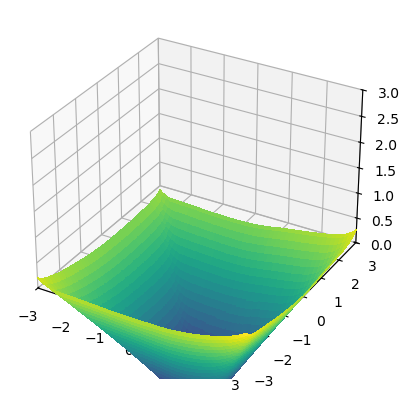

Mean square error: tensor(6.4107)
L-infinity error: tensor(5.9850)
Run time: tensor(11.0711)


100%|██████████| 1000/1000 [00:05<00:00, 191.11it/s]


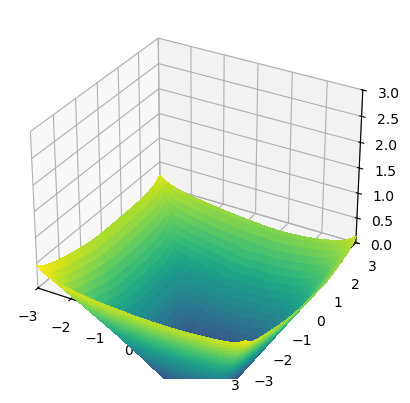

Mean square error: tensor(6.2778)
L-infinity error: tensor(5.9771)
Run time: tensor(10.5052)


100%|██████████| 1000/1000 [00:05<00:00, 181.95it/s]


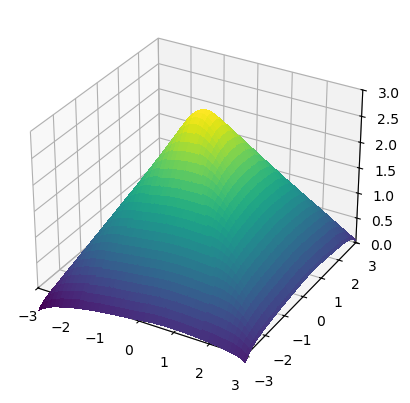

Mean square error: tensor(0.0292)
L-infinity error: tensor(0.4429)
Run time: tensor(11.3636)


100%|██████████| 1000/1000 [00:05<00:00, 195.49it/s]


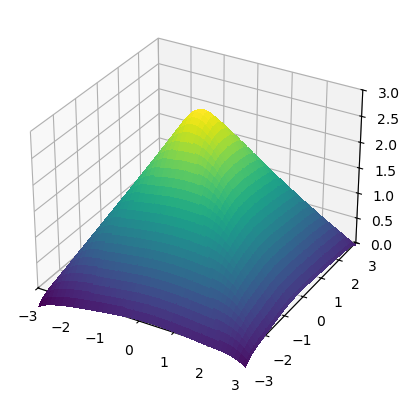

Mean square error: tensor(0.0115)
L-infinity error: tensor(0.3677)
Run time: tensor(9.9848)


In [3]:
from NeuralNetworks.NNs import FCFF_3L_ELU

n_experiments = 10

MSE_history = torch.zeros([n_experiments, rounds])
L_inf_error_history = torch.zeros([n_experiments, rounds])
run_time_history = torch.zeros([n_experiments, rounds])

for j in range(n_experiments):

    # We define the NN
    NN = FCFF_3L_ELU([dim,20,20])
    training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)

    X_axis = 0
    Y_axis = 1
    n_grid = 100
    #plot_2d_proj(X_axis, Y_axis, NN, n_grid, side_length)

    for i in range(rounds):
        
        training_params['alpha'] = alpha_list[i]
        training_params['delta'] = delta_list[i]
        training_params['n_coloc_points'] = N_col_list[i]
        training_params['n_boundary_points'] = N_b_list[i]
        training_params['num_iterations'] = num_iterations_list[i]
        
        t0 = t()
        total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
        t1 = t() - t0 
        
        
        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_cube(NN, side_length, MC_points)
        
        MSE_history[j, i] = MSE
        L_inf_error_history[j, i] = L_inf
        run_time_history[j, i] = t1
        
        X_axis = 0
        Y_axis = 1
    
        n_grid = 100
    plot_2d_proj(X_axis, Y_axis, NN, n_grid, side_length)
    
    print('Mean square error:', MSE)
    print('L-infinity error:', L_inf)
    print('Run time:', run_time_history[j].sum())

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_47436\3493352029.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_47436\3493352029.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


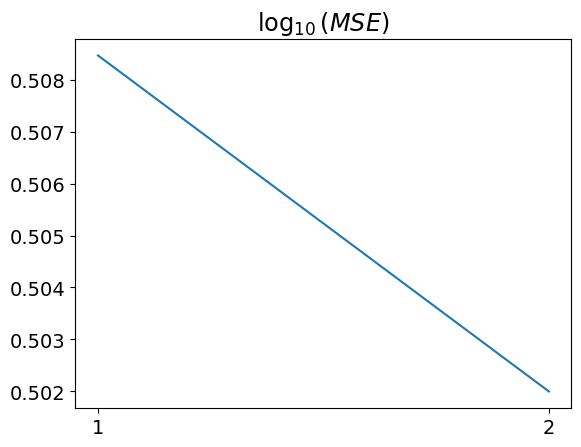

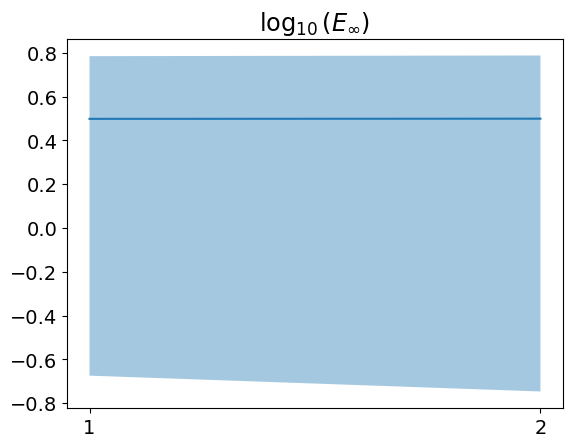

In [4]:
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot


x = np.arange(rounds) + 1
MSE = MSE_history.mean(dim = 0)
MSE_std = MSE_history.std(dim = 0)

ax = host_subplot(111)
ax.plot(x, MSE.log10())
ax.fill_between(x,
                (MSE - MSE_std).log10(),
                (MSE + MSE_std).log10(),
                alpha = .4)
ax.set_xticks(x)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.show()


L_inf = L_inf_error_history.mean(dim = 0)
L_inf_std = L_inf_error_history.std(dim = 0)
ax = host_subplot(111)
ax.plot(x, L_inf.log10())
ax.fill_between(x,
               (L_inf - L_inf_std).log10(),
               (L_inf + L_inf_std).log10(),
               alpha = .4)
ax.set_xticks(x)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.show()